<a href="https://colab.research.google.com/github/guiaustregesilo-ds/Obesity-among-Adults-by-Country---1975-a-2016/blob/main/Obesity_among_Adults_by_Country_1975_a_2016_of.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 IMPORTS

In [99]:
import inflection

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from google import colab

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0.1 HELPER FUNCTIONS

## 0.2 LOADING DATA

In [101]:
df_obesity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto Obesidade - Asimov/datasets/obesity_cleaned.csv', index_col=0)
df_gdp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto Obesidade - Asimov/datasets/gdp.csv', decimal='.')

# 1.0 DATA DESCRIPTION

In [102]:
df1_ob = df_obesity.copy()
df1_gdp = df_gdp.copy()

## 1.1 Rename Columns

### 1.1.1 Obesity

In [103]:
df1_ob.columns

Index(['Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [104]:
cols_old_ob = ['Country', 'Year', 'Obesity (%)', 'Sex']

snakecase = lambda x: inflection.underscore(x)

cols_new_ob = list(map(snakecase, cols_old_ob))

# rename
df1_ob.columns = cols_new_ob

In [105]:
df1_ob.columns

Index(['country', 'year', 'obesity (%)', 'sex'], dtype='object')

### 1.1.2 GDP

In [106]:
df1_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

In [107]:
cols_old_gdp = ['Country', 'Region', 'Year', ' GDP_pp ']

snakecase = lambda x: inflection.underscore(x)

cols_new_gdp = list(map(snakecase, cols_old_gdp))

# rename
df1_gdp.columns = cols_new_gdp

In [108]:
df1_gdp.columns

Index(['country', 'region', 'year', ' gdp_pp '], dtype='object')

## 1.2 Data Dimension

In [109]:
print('Number of Rows Obesity: {}'.format(df1_ob.shape[0]))
print('Number of Columns Obesity: {}'.format(df1_ob.shape[1]))
print('-------------------')
print('Number of Rows GDP: {}'.format(df1_gdp.shape[0]))
print('Number of Columns GDP: {}'.format(df1_gdp.shape[1]))

Number of Rows Obesity: 24570
Number of Columns Obesity: 4
-------------------
Number of Rows GDP: 4419
Number of Columns GDP: 4


## 1.3 Data Types

In [110]:
df1_ob.dtypes

,0
country,object
year,int64
obesity (%),object
sex,object


In [111]:
df1_gdp.dtypes

,0
country,object
region,object
year,object
gdp_pp,object


## 1.4 Check NA's

In [112]:
df1_ob.isna().sum()

,0
country,0
year,0
obesity (%),0
sex,0


In [113]:
df1_gdp.isna().sum()

,0
country,0
region,0
year,0
gdp_pp,0


### 1.4.1 - Column Obesity(%) - Obesity

In [114]:
# conferindo a coluna 'Obesity (%)'

df1_ob['obesity (%)'].value_counts()

# separar infos com o split

#df1['Obesity (%)'].iloc[0].split()

# função para limpar os dados

df1_ob['obesity'] = df1_ob['obesity (%)'].apply(lambda x:x.split()[0])

# substituindo os valores faltantes por NA'set

df1_ob.loc[df1_ob['obesity'] == 'No', 'obesity'] = np.nan

# dropando os NaN'set

df1_ob['obesity'] = df1_ob['obesity'].dropna()

# dropando a coluna 'Obesity (%)'

df1_ob.drop('obesity (%)', axis=1, inplace=True)

### 1.4.2 - Columns Year - GDP

In [115]:
# limpando a coluna year e transformando em int

df1_gdp["year"] = df1_gdp["year"].astype(str).apply(lambda x: int(x.split("/")[-1]))

#df1_gdp['year'] = df1_gdp['year'].astype(str).apply(lambda x: int(x.split('/')[-1]) if '/' in x else int(x))


### 1.4.3 - Column GDP_PP

In [116]:
df1_gdp['gdp_pp'] = df1_gdp[' gdp_pp '].apply(lambda x: float(x.split()[0].replace(',', '')))

df1_gdp.drop(' gdp_pp ', axis=1, inplace=True)


## 1.5 Change Types

In [117]:
df1_ob['obesity'] = df1_ob['obesity'].apply(lambda x: float(x))
df1_ob['year'] = df1_ob['year'].apply(lambda x: int(x))

## 1.6 Descriptive Statistical

In [118]:
num_attributes_ob = df1_ob.select_dtypes(include=['int64', 'float64'])
cat_attributes_ob = df1_ob.select_dtypes(exclude=['int64', 'float64','datetime'])

In [119]:
num_attributes_gdp = df1_gdp.select_dtypes(include=['int64', 'float64'])
cat_attributes_gdp = df1_gdp.select_dtypes(exclude=['int64', 'float64','datetime'])

## 1.6.1 Numerical Attributes - Obesity

In [120]:
# Central Tendences - mean, median
ct1 = pd.DataFrame(num_attributes_ob.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes_ob.apply(np.median)).T

# Dispersion - std, min, max, range, skew
d1 = pd.DataFrame(num_attributes_ob.apply(np.std)).T
d2 = pd.DataFrame(num_attributes_ob.apply(min)).T
d3 = pd.DataFrame(num_attributes_ob.apply(max)).T
d4 = pd.DataFrame(num_attributes_ob.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes_ob.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes_ob.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

# Name Columns
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,year,1975.0,2016.0,41.0,1995.500000,1995.5,12.120919,0.000000,-1.201362
1,obesity,0.1,63.3,63.2,12.448932,NaN,10.407212,1.315083,2.320757


### 1.6.2 Numerical Attributes - GDP

In [121]:
# Central Tendences - mean, median
ct1 = pd.DataFrame(num_attributes_gdp.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes_gdp.apply(np.median)).T

# Dispersion - std, min, max, range, skew
d1 = pd.DataFrame(num_attributes_gdp.apply(np.std)).T
d2 = pd.DataFrame(num_attributes_gdp.apply(min)).T
d3 = pd.DataFrame(num_attributes_gdp.apply(max)).T
d4 = pd.DataFrame(num_attributes_gdp.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes_gdp.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes_gdp.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

# Name Columns
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,year,1901.00,2011.0,110.00,1956.027155,1956.00,33.171524,-0.001229,-1.205386
1,gdp_pp,285.15,118681.3,118396.15,5551.033745,2201.46,9299.023884,4.419401,29.430225


<Axes: xlabel='gdp_pp', ylabel='Count'>

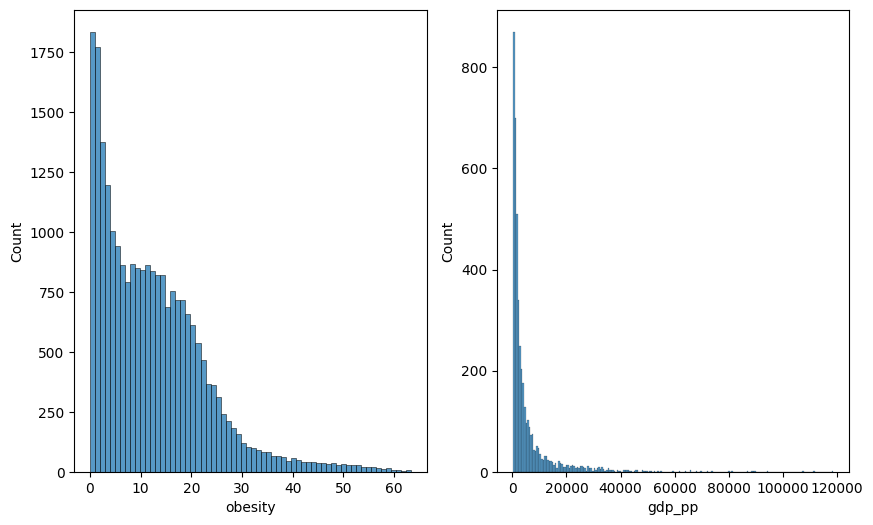

In [122]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df1_ob['obesity'])

plt.subplot(1, 2, 2)
sns.histplot(df1_gdp['gdp_pp'])

## 1.6.3 Categorical Attributes

In [123]:
# check categorical attributes - obesity

cat_attributes_ob.apply(lambda x: x.unique().shape[0])
print(cat_attributes_ob.apply(lambda x: x.unique().shape[0]))

print('---------------------')
# check categorical attributes - gdp

cat_attributes_gdp.apply(lambda x: x.unique().shape[0])
print(cat_attributes_gdp.apply(lambda x: x.unique().shape[0]))

country    195
sex          3
dtype: int64
---------------------
country    193
region       8
dtype: int64


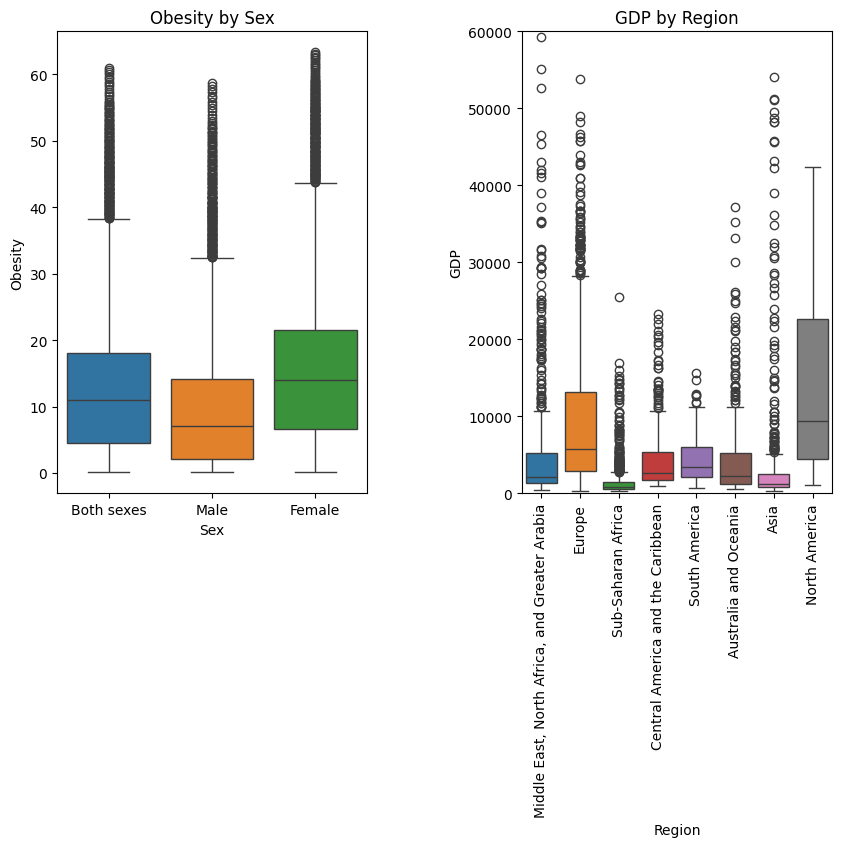

In [124]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='obesity', data=df1_ob, hue='sex', legend=False)
plt.title('Obesity by Sex')
plt.xlabel('Sex')
plt.ylabel('Obesity')


plt.subplot(1, 2, 2)
sns.boxplot(x='region', y='gdp_pp', data=df1_gdp, hue='region', legend=False)
plt.title('GDP by Region')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.ylabel('GDP')
plt.ylim(0, 60000)

plt.subplots_adjust(wspace=0.5)

plt.show()

# 2.0 FEATURE ENGINEERING

In [125]:
df2_ob = df1_ob.copy()
df2_gdp = df1_gdp.copy()

## 2.1 Questions - Obesity



1. Qual o percentual médio de obesidade por sexo no mundo, no ano de 2015 ?
2. Quais são os 5 países com maior e menor taxa de aumento nos índices de obesidade no período observado ?
3. Quais os países com maiores e menores níveis percentuais de obesidade em 2015 ?
4. Qual a diferença média percentual de obesidade entre os sexos ao longo dos anos para o Brasil ?
5. Plote um grafico sobre a evolução da obesidade de ambos os sexos no mundo.

## 2.2 Questions - GDP

1. Qual o primeiro valor registrado para cada país ?
2. Quais são as Regiões com os maiores crescimento de PIB per capta no Século Passado?
3. Preencha os anos ausentes em cada país com uma estimativa baseada na diferença entre o próximo registro e o anterior

## 2.3 Hipoteses

1. Países com maior PIB têm maior taxa de obesidade?
2. A urbanização influencia no aumento da obesidade?
3. Regiões geográficas influenciam a obesidade?
4. Países com alto consumo de fast food tendem a ter maior obesidade?
5. A obesidade tem relação com o Índice de Desenvolvimento Humano (IDH)?

# 3.0 EXPLORATORY DATA ANALYSIS - E.D.A

In [126]:
df3_ob = df2_ob.copy()
df3_gdp = df2_gdp.copy()

## 3.1 Questions - Obesity

1. Qual o percentual médio de obesidade por sexo no mundo, no ano de 2015 ?
2. Quais são os 5 países com maior e menor taxa de aumento nos índices de obesidade no período observado ?
3. Quais os países com maiores e menores níveis percentuais de obesidade em 2015 ?
4. Qual a diferença média percentual de obesidade entre os sexos ao longo dos anos para o Brasil ?
5. Plote um grafico sobre a evolução da obesidade de ambos os sexos no mundo.

### P1 - Qual o percentual médio de obesidade por sexo no mundo, no ano de 2015 ?

In [127]:
# Qual o percentual médio de obesidade por sexo no mundo, no ano de 2015 ?

# filtrando o ano de 2015
df_2015 = df3_ob[df3_ob['year'] == 2015]

# tirando a média e agrupando por sexo
obesity_by_sex = df_2015.groupby('sex')['obesity'].mean().reset_index()

obesity_by_sex

,sex,obesity
0,Both sexes,19.508377
1,Female,22.899476
2,Male,15.980628


### P2 - Quais são os 5 países com maior e menor taxa de aumento nos índices de obesidade no período observado ?


In [128]:
# criando o periodo de tempo
df3_start_ob = df3_ob[df3_ob['year'] == 1975]
df3_end_ob = df3_ob[df3_ob['year'] == 2016]

# setando os index
df3_start_ob.set_index('country', inplace=True)
df3_end_ob.set_index('country', inplace=True)

# Selecionando apenas os dados de "Both sexes"
df3_start_filtered = df3_start_ob[df3_start_ob['sex'] == 'Both sexes']
df3_end_filtered = df3_end_ob[df3_end_ob['sex'] == 'Both sexes']

# Calculando a evolução da obesidade por país
df3_ev = df3_end_filtered['obesity'] - df3_start_filtered['obesity']

# Ordenando os países pela maior e menor variação
df3_ev_sorted = df3_ev.sort_values(ascending=False).dropna()

# Top 5 países com maior aumento
top_5_aumento = df3_ev_sorted.head(5)

# Top 5 países com menor aumento (ou maior redução)
top_5_reducao = df3_ev_sorted.tail(5)

# Exibindo os resultados
print("Top 5 países com maior aumento na obesidade:")
print(top_5_aumento)

print("\nTop 5 países com menor aumento (ou redução) na obesidade:")
print(top_5_reducao)

Top 5 países com maior aumento na obesidade:
country
Tuvalu          33.7
Niue            31.1
Kiribati        30.1
Tonga           28.3
Cook Islands    27.9
Name: obesity, dtype: float64

Top 5 países com menor aumento (ou redução) na obesidade:
country
Timor-Leste    3.6
Bangladesh     3.4
Japan          3.3
Singapore      3.1
Viet Nam       2.0
Name: obesity, dtype: float64


### P3 - Quais os países com maiores e menores níveis percentuais de obesidade em 2015 ?

In [129]:
# definindo periodo
df_2015 = df3_ob[df3_ob['year'] == 2015]

# definindo o percentual maximo
df_max_ob = df_2015[df_2015['obesity'] == df_2015['obesity'].max()]

# definindo o percentual minimo
df_min_ob = df_2015[df_2015['obesity'] == df_2015['obesity'].min()]

print("País com maior percentual de obesidade em 2015:")
print(df_max_ob)

print("\nPaís com menor percentual de obesidade em 2015:")
print(df_min_ob)


País com maior percentual de obesidade em 2015:
      country  year     sex  obesity
15116   Nauru  2015  Female     63.1

País com menor percentual de obesidade em 2015:
        country  year   sex  obesity
24187  Viet Nam  2015  Male      1.5


### P4 - Qual a diferença média percentual de obesidade entre os sexos ao longo dos anos para o Brasil ?

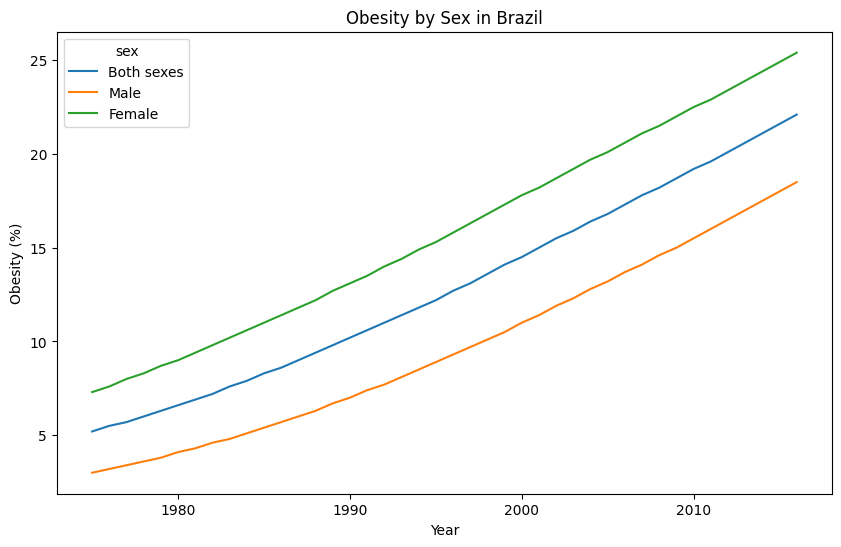

In [130]:
# selecionando os dados apenas do Brasil
df3_brazil = df3_ob[df3_ob['country'] == 'Brazil']

# selecionando os sexos no DataFrame Brazil
df3_br_male = df3_brazil[df3_brazil['sex'] == 'Male']
df3_br_female = df3_brazil[df3_brazil['sex'] == 'Female']

# calculando a diferença entre os sexos
df3_diff_br = df3_br_male['obesity'].mean() - df3_br_female['obesity'].mean()

# plotando grafico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df3_brazil, x='year', y='obesity', hue='sex')
plt.ylabel('Obesity (%)')
plt.xlabel('Year')
plt.title('Obesity by Sex in Brazil')
plt.show()


### P5 - Plote um gráfico sobre a evolução da obesidade de ambos os sexos no mundo.

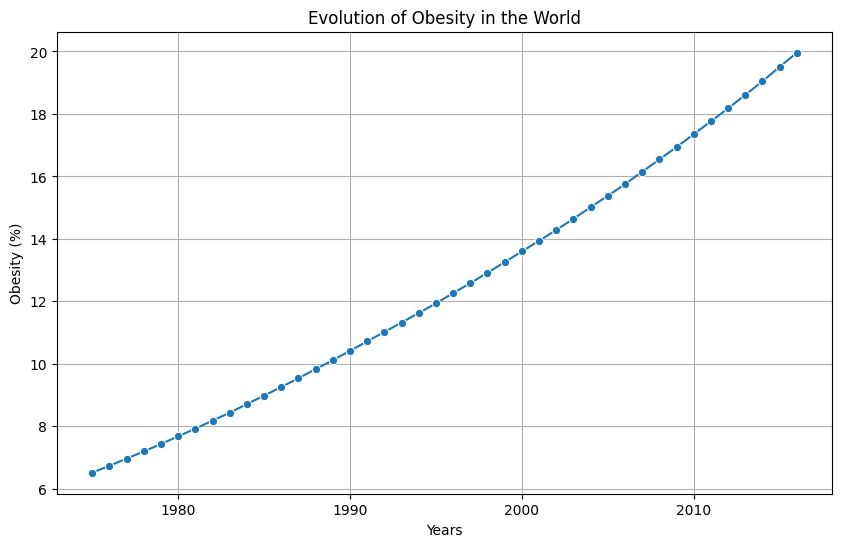

In [131]:
# criando a variavel 'Both sexes'
df3_both = df3_ob[df3_ob['sex'] == 'Both sexes']

# medindo o comportamento da média durante os anos
df3_both_mean = df3_both.groupby('year')['obesity'].mean()

# plotando o grafico
plt.figure(figsize=(10, 6))
sns.lineplot(x=df3_both_mean.index, y=df3_both_mean.values, marker='o', linestyle='-')
plt.ylabel('Obesity (%)')
plt.xlabel('Years')
plt.title('Evolution of Obesity in the World')
plt.grid(True)

## 3.2 Questions - GDP

### P1. Qual o primeiro valor registrado para cada país ?

In [132]:
df3_gdp.groupby('country').min()['year']

,year
country,
Afghanistan,1901
Albania,1901
Algeria,1901
Andorra,1901
Angola,1901
...,...
Venezuela,1901
Vietnam,1901
"Yemen, Rep.",1901


In [133]:
# conferindo a data maxima de um pais inserido no dataframe
df3_gdp.groupby('country')['year'].min().max()

# descobrindo quantas datas diferentes temos
df3_gdp.groupby('country')['year'].min().value_counts()

# descobrindo qual foi o ultimo país a ser registrado
df3_gdp.groupby('country')['year'].min()[df3_gdp.groupby('country')['year'].min() == 1991]

,year
country,
Kosovo,1991


### P2 - Quais são as Regiões com os maiores crescimento de PIB per capta no Século Passado?

In [134]:
# definindo o período antes do século atual
df3_gdp[df3_gdp['year'] < 2000].max()

# definindo os anos de start e end
df3_gdp_start = df3_gdp[df3_gdp['year'] == 1901]
df3_gdp_end = df3_gdp[df3_gdp['year'] == 1996]

# calculando a diferença entre os periodos
((df3_gdp_end.groupby('region')['gdp_pp'].mean() / df3_gdp_start.groupby('region')['gdp_pp'].mean() - 1) * 100 ).sort_values(ascending=False).reset_index()

,region,gdp_pp
0,"Middle East, North Africa, and Greater Arabia",857.215950
1,Asia,711.761516
2,Europe,594.046167
3,North America,589.760175
4,Central America and the Caribbean,406.426789
5,Australia and Oceania,396.075383
6,South America,312.123735
7,Sub-Saharan Africa,248.633780


### P3 - Preencha os anos ausentes em cada país com uma estimativa baseada na diferença entre o próximo registro e o anterior

In [135]:
# criando a lista de anos atraves do arange
arr_year = np.arange(df3_gdp['year'].min(), df3_gdp['year'].max())

# criando o dataframe all years
df3_gdp_all_years = pd.DataFrame(arr_year, columns=['year'])

# setando o index do dataframe criado
df3_gdp_all_years.index = df3_gdp_all_years['year']

# criando o dataframe dos anos que não estão no dataframe original e invertendo a ordem
df3_gdp_years_off = ~df3_gdp_all_years['year'].isin(df3_gdp['year'])
df3_gdp_years_off = df3_gdp_years_off[df3_gdp_years_off].index

In [136]:
df3_gdp_years_off

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='year')

In [137]:
# definindo a ordem do dataframe
df3_gdp = df3_gdp.sort_values(['country', 'year'])

# calculando a variação da oscilaçao do GDP e quantos anos se passaram
df3_gdp['delta_gdp'] = df3_gdp['gdp_pp'] - df3_gdp['gdp_pp'].shift(1)
df3_gdp['delta_year'] = df3_gdp['year'] - df3_gdp['year'].shift(1)
df3_gdp['gdp_year'] = (df3_gdp['delta_gdp'] / df3_gdp['delta_year']).shift(-1)
df3_gdp['next_year'] = df3_gdp['year'].shift(-1)

# deletando as colunas que não serão mais necessárias
del df3_gdp['delta_gdp'], df3_gdp['delta_year']



In [138]:
# criando o dataframe que serão inseridas as novas informações
df3_gdp_nd = pd.DataFrame()

# utilizando a interação com interrows
for idx, row in df3_gdp.iterrows():
    if row['year'] == 2011:
      continue

    # adicionando os anos através de condicionais
    years_to_add = df3_gdp_years_off[(df3_gdp_years_off < row['next_year']) & (df3_gdp_years_off > row['year'])]

    for new_year in years_to_add:
        add_row = row.copy() # fazendo uma copia para manipulação e depois ser inserido
        add_row['gdp_pp'] = (new_year - add_row['year']) * add_row['gdp_year'] + add_row['gdp_pp']
        add_row['year'] = new_year
        add_row['kind'] = 'estimated'
        df3_gdp_nd = pd.concat([df3_gdp_nd, add_row.to_frame().transpose()])

In [139]:
# checando o df de forma aleatória

df3_gdp.iloc[100:].head(10)

,country,region,year,gdp_pp,gdp_year,next_year
100,Angola,Sub-Saharan Africa,1941,2170.80,119.530,1946.0
101,Angola,Sub-Saharan Africa,1946,2768.45,134.490,1951.0
102,Angola,Sub-Saharan Africa,1951,3440.90,21.628,1956.0
103,Angola,Sub-Saharan Africa,1956,3549.04,182.958,1961.0
104,Angola,Sub-Saharan Africa,1961,4463.83,168.862,1966.0
105,Angola,Sub-Saharan Africa,1966,5308.14,43.614,1971.0
106,Angola,Sub-Saharan Africa,1971,5526.21,-495.178,1976.0
107,Angola,Sub-Saharan Africa,1976,3050.32,-19.382,1981.0
108,Angola,Sub-Saharan Africa,1981,2953.41,-146.560,1986.0
109,Angola,Sub-Saharan Africa,1986,2220.61,102.048,1991.0


In [140]:
# concatenando os dataframes
df3_gdp = pd.concat([df3_gdp, df3_gdp_nd]).sort_values(['country', 'year'])

# preenchendo os valores com real
df3_gdp['kind'] = df3_gdp['kind'].fillna('real')

# setando o index
df3_gdp.index = df3_gdp['year']

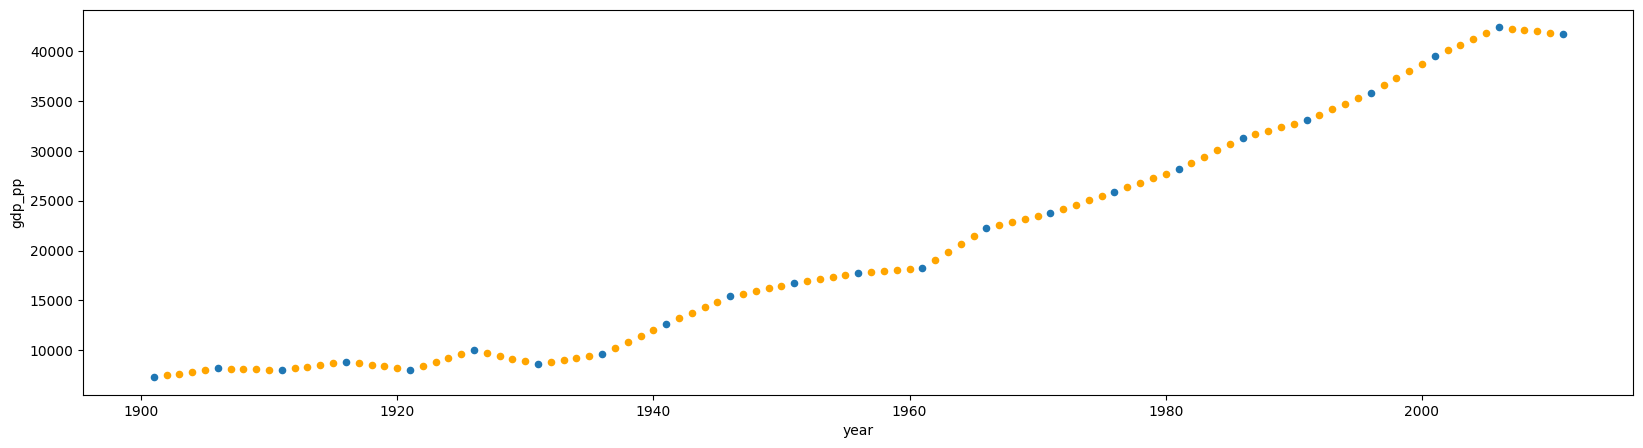

In [141]:
fig, ax = plt.subplots(figsize=(20, 5))
df3_gdp[(df3_gdp['kind'] == 'real') & (df3_gdp['country'] == 'United States')].plot(kind='scatter', x='year', y='gdp_pp', ax=ax)
df3_gdp[(df3_gdp['kind'] == 'estimated') & (df3_gdp['country'] == 'United States')].plot(kind='scatter', x='year', y='gdp_pp', ax=ax, color = 'orange')
plt.show()